# IBM Stock Data

In [1]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import yfinance as yf
from pathlib import Path
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from CommonFunctions import enhance_plot
from matplotlib import pyplot as plt
from matplotlib.collections import PolyCollection
%matplotlib inline

In [3]:
CSV_PATH = Path('./IBMFinanceData')
CSV_PATH.mkdir(parents=True, exist_ok=True)
IBM_NAME = 'IBM.csv'
IBM_PATH = CSV_PATH / IBM_NAME

In [4]:
start_date, end_date = '2022-10-1', '2022-12-15'
max_lag = 50
try:
    IBM = pd.read_csv(IBM_PATH)
except FileNotFoundError:
    IBM = yf.download('IBM', start=start_date, end=end_date)
    IBM.to_csv(IBM_PATH)
IBM.set_index('Date', inplace=True)
IBM.index = pd.to_datetime(IBM.index)
IBM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,120.160004,122.209999,119.599998,121.510002,113.363274,4261700
2022-10-04,122.800003,125.650002,122.519997,125.500000,117.085754,4566100
2022-10-05,124.709999,126.459999,124.230003,125.739998,117.309669,3212900
2022-10-06,124.879997,125.300003,121.769997,122.230003,114.035004,5074600
2022-10-07,121.500000,121.800003,118.070000,118.820000,110.853630,4499700


In [5]:
IBM_close = IBM.Close
IBM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2022-10-03 to 2022-12-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       52 non-null     float64
 1   High       52 non-null     float64
 2   Low        52 non-null     float64
 3   Close      52 non-null     float64
 4   Adj Close  52 non-null     float64
 5   Volume     52 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 2.8 KB


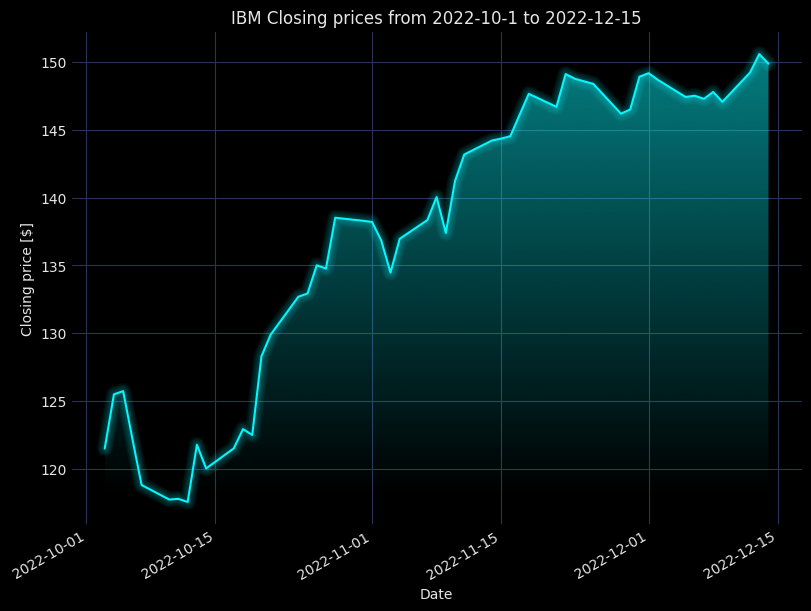

In [6]:
with plt.style.context('cyberpunk'):
    figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(8, 6))
    axes.set(title=f'IBM Closing prices from {start_date} to {end_date}', ylabel='Closing price [$]')
    IBM_close.plot(ax=axes)
    enhance_plot(figure, axes, glow=True, alpha_gradient=0.5)

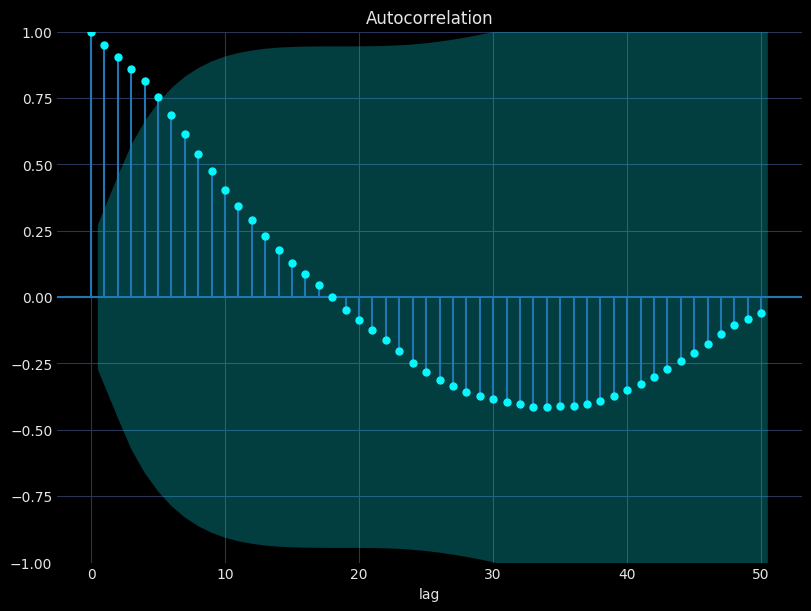

In [7]:
with plt.style.context('cyberpunk'):
    figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(8, 6))
    plot_acf(IBM_close, lags=max_lag, ax=axes)
    axes.set(xlabel='lag')
    enhance_plot(figure, axes)

In [8]:
ljungbox = acorr_ljungbox(IBM_close, lags=max_lag, return_df=True)
ljungbox

,lb_stat,lb_pvalue
1,49.647329,1.840204e-12
2,95.709808,1.647704e-21
3,138.188974,9.288204e-30
4,176.923863,3.412790e-37
5,210.847024,1.355455e-43
6,239.542179,7.030763e-49
7,263.157368,4.372785e-53
8,281.815527,3.037163e-56
9,296.638983,1.347450e-58
10,307.566169,3.905238e-60


Very small p-values suggest strong dependence

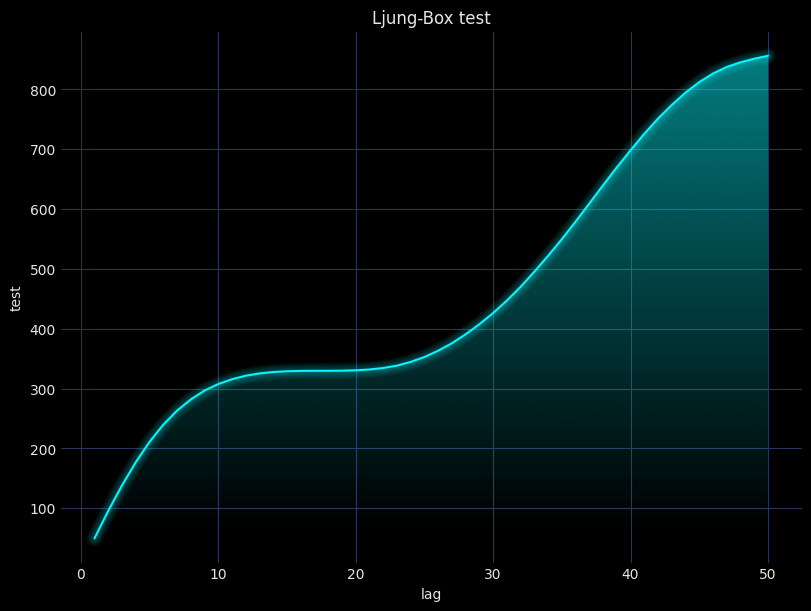

In [9]:
with plt.style.context('cyberpunk'):
    figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(8, 6))
    ljungbox.lb_stat.plot(ax=axes)
    axes.set(xlabel='lag', ylabel='test', title='Ljung-Box test')
    enhance_plot(figure, axes, glow=True, alpha_gradient=0.5)

In [10]:
adfuller(IBM_close)

(-0.9398265301140788,
 0.7745742921429309,
 0,
 51,
 {'1%': -3.5656240522121956,
  '5%': -2.920142229157715,
  '10%': -2.598014675124952},
 155.18452957975032)

Second element is the p-value. This time larger than 0.05 and this suggest autocorrelation

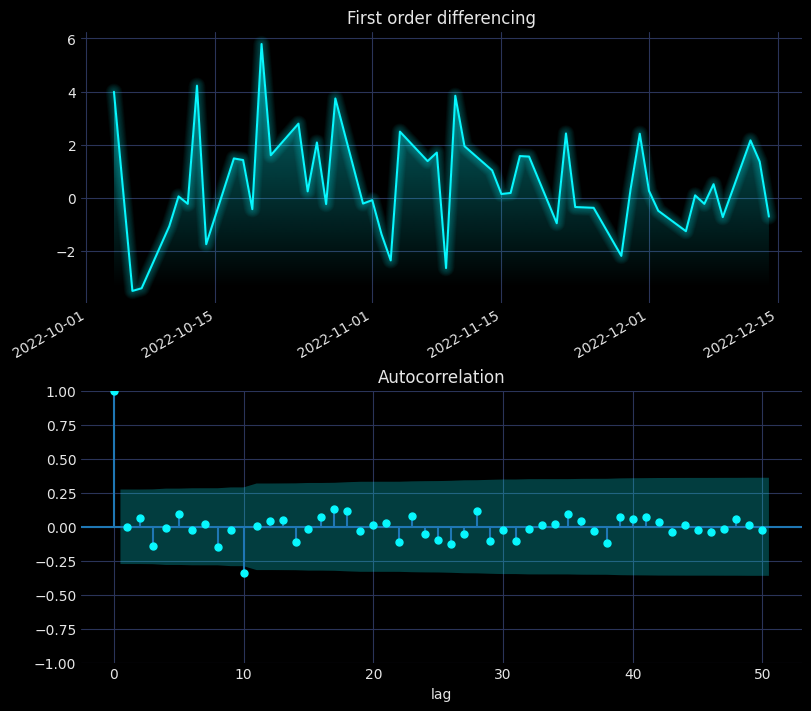

In [11]:
IBM_close_diff = IBM_close.diff().dropna()
with plt.style.context('cyberpunk'):
    figure, axes = plt.subplots(2, 1, layout='constrained', figsize=(8, 7))
    IBM_close_diff.plot(ax=axes[0])
    axes[0].set(xlabel='', title='First order differencing')
    plot_acf(IBM_close_diff, ax=axes[1], lags=max_lag)
    axes[1].set(xlabel='lag')
    enhance_plot(figure, axes[0], glow=True, alpha_gradient=0.5)
    enhance_plot(figure, axes[1])

In [12]:
acorr_ljungbox(IBM_close_diff, lags=max_lag, return_df=True)

,lb_stat,lb_pvalue
1,0.000186,0.989111
2,0.210220,0.900226
3,1.363646,0.714078
4,1.367764,0.849778
5,1.922366,0.859780
6,1.964599,0.922925
7,1.982914,0.960780
8,3.421347,0.905207
9,3.460384,0.943222
10,11.117491,0.348438


P-values are bigger than 0.05, thus time series is independent

In [13]:
adfuller(IBM_close_diff)

(-3.4975412197820352,
 0.008050465740386406,
 9,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 153.77750286497985)

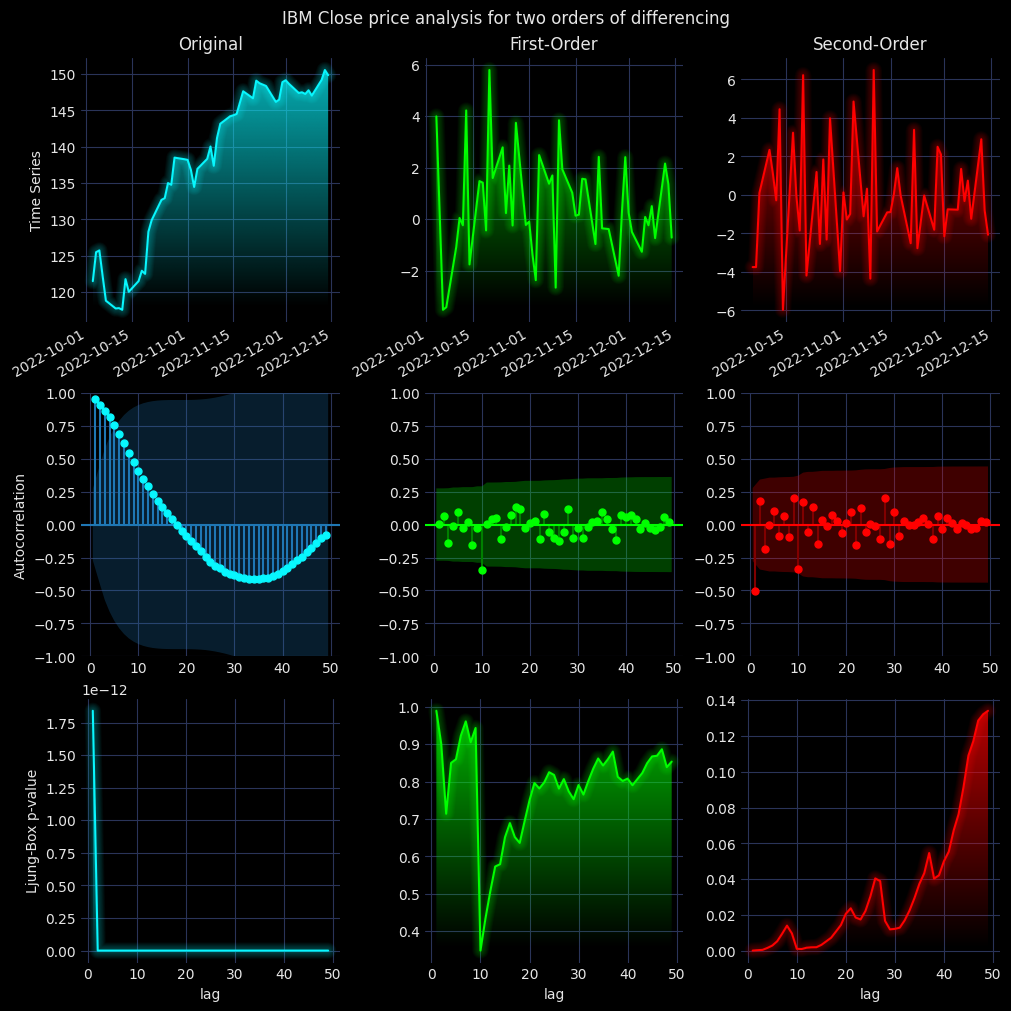

In [14]:
IBM_close_diff_diff = IBM_close_diff.diff().dropna().iloc[:max_lag+1]
colors = [None, 'lime', 'red']
bg_colors = [None, 'green', 'maroon']
titles = ['Original', 'First-Order', 'Second-Order']
series_list = [IBM_close, IBM_close_diff, IBM_close_diff_diff]
with plt.style.context('cyberpunk'):
    figure, axes = plt.subplots(3, 3, layout='constrained', figsize=(10, 10))
    for index, (series, title, color) in enumerate(zip(series_list, titles, colors)):
        series.plot(ax=axes[0, index], color=color)
        axes[0, index].set(xlabel=None, title=title)
        enhance_plot(figure, axes[0, index], glow=True, alpha_gradient=0.7)
    axes[0, 0].set(ylabel='Time Series')
    for index, (series, color, bg_color) in enumerate(zip(series_list, colors, bg_colors)):
        plot_acf(series, ax=axes[1, index], lags=range(1, max_lag), color=color, 
                 vlines_kwargs=dict(color=bg_color), title=None)
        axes[1, index].set(xlabel=None)
        for item in axes[1, index].collections:
            if type(item) == PolyCollection:
                item.set_facecolor(color)
        enhance_plot(figure, axes[1, index])
    axes[1, 0].set(ylabel='Autocorrelation')
    for index, (series, color) in enumerate(zip(series_list, colors)):
        acorr_ljungbox(series, lags=range(1, max_lag), return_df=True)\
            .lb_pvalue.plot(ax=axes[2, index], color=color)
        axes[2, index].set(xlabel='lag')
        enhance_plot(figure, axes[2, index], glow=True, alpha_gradient=0.7)
    axes[2, 0].set(ylabel='Ljung-Box p-value')
    figure.suptitle('IBM Close price analysis for two orders of differencing')